In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Load the dataset
data = pd.read_csv('supermarket_sales.csv')

In [28]:
# Display the first few rows of the dataset
print(data.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  2019-01-05  13:08      Ewallet  522.83                 4.761905   
1  2019-03-08  10:29         Cash   76.40                 4.761905   
2  2019-03-03  13:23

In [29]:
## Exploratory Data Analysis (EDA)
# Check for missing values
print(data.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
dtype: int64


In [30]:
# Basic statistics of numerical features
print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating          Day  \
count             1.000000e+03   1000.000000  1000.00000  1000.000000   
mean              4.761905e+00     15.379369     6.97270    15.256000   
std               6.131498e-14     11.708825     1.71858     8.693563   
min               4.761905e+00      0.508500     4

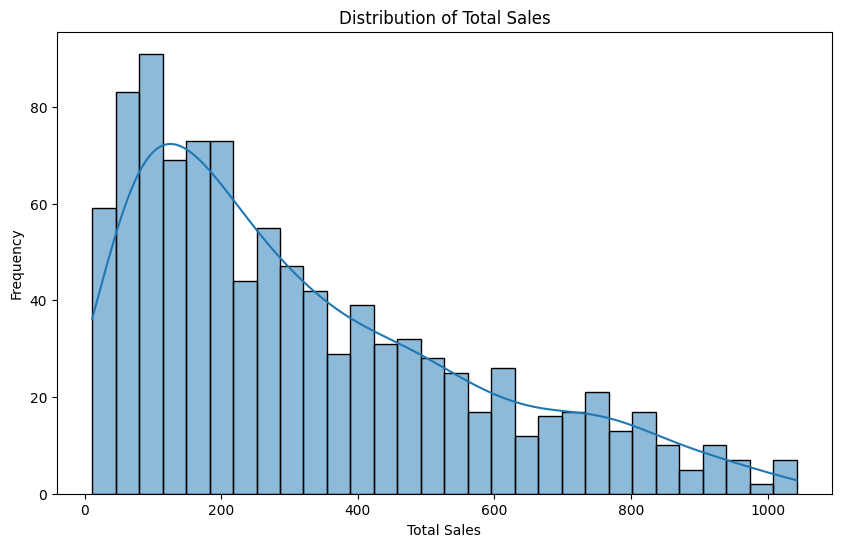

In [31]:
# Visualizing the distribution of 'Total' sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

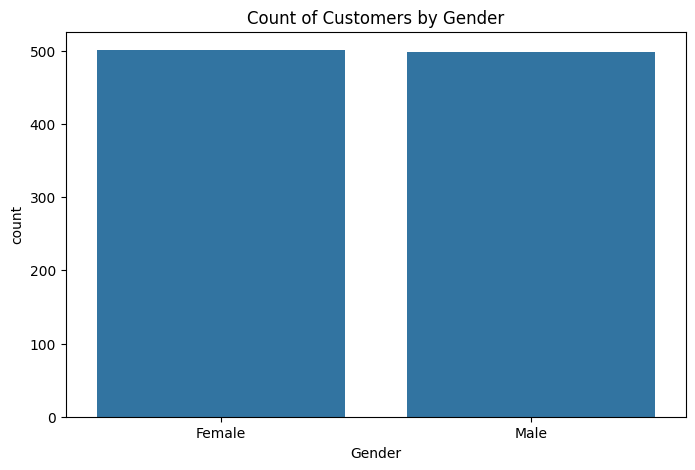

In [32]:
# Countplot for 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data)
plt.title('Count of Customers by Gender')
plt.show()

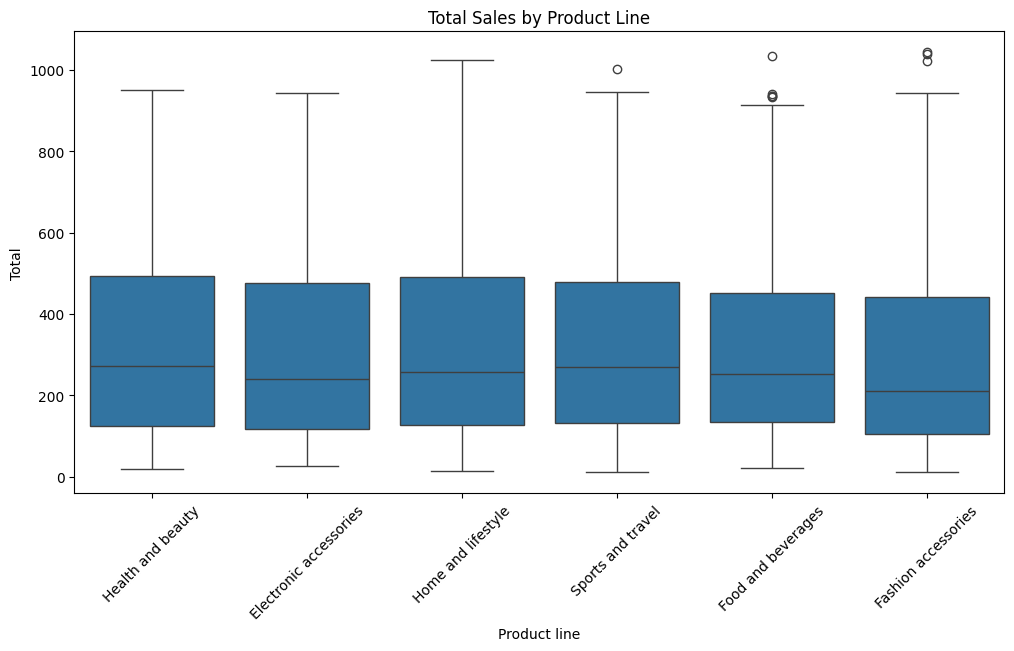

In [33]:
# Boxplot for 'Total' sales by 'Product line'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='Total', data=data)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

In [34]:
## Data Preparation
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

In [35]:
# Define features and target variable for classification
X = data_encoded.drop(['Invoice ID', 'Date', 'Time', 'Total'], axis=1)
y = (data['Total'] > data['Total'].mean()).astype(int)  # Binary classification: above or below average total sales

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
## Modeling without Data Preparation (using raw data)
# Using Random Forest Classifier without any preparation (just for demonstration)
model_raw = RandomForestClassifier(random_state=42)
model_raw.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Predictions and evaluation
y_pred_raw = model_raw.predict(X_test)
print("Classification Report (Raw Data):")
print(classification_report(y_test, y_pred_raw))
print("Confusion Matrix (Raw Data):")
print(confusion_matrix(y_test, y_pred_raw))

Classification Report (Raw Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix (Raw Data):
[[113   0]
 [  0  87]]


In [39]:
## Modeling with Data Preparation (using prepared data)
model_prepared = RandomForestClassifier(random_state=42)
model_prepared.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions and evaluation
y_pred_prepared = model_prepared.predict(X_test)
print("Classification Report (Prepared Data):")
print(classification_report(y_test, y_pred_prepared))
print("Confusion Matrix (Prepared Data):")
print(confusion_matrix(y_test, y_pred_prepared))

Classification Report (Prepared Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix (Prepared Data):
[[113   0]
 [  0  87]]


In [41]:
# Data correlation analysis
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

In [42]:
# Data correlation analysis
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

In [43]:
numerical_data = data_encoded.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_data.drop(columns=['Invoice ID', 'Date'], errors='ignore').corr()  # errors='ignore' to handle if columns are already dropped

In [44]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

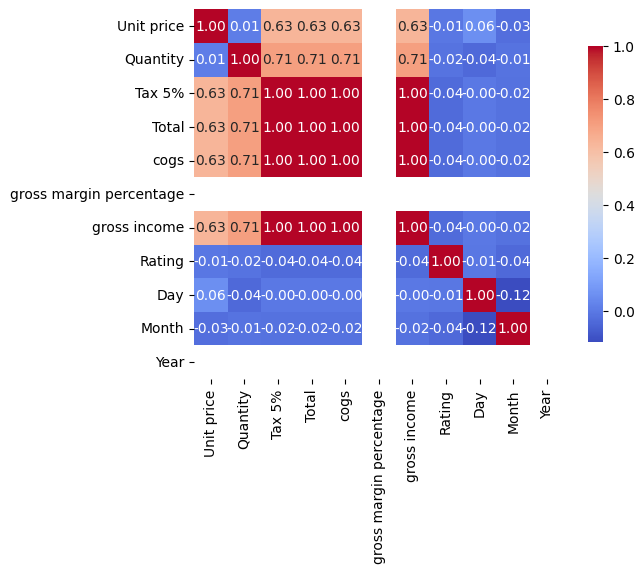

In [45]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [46]:
import joblib

In [47]:
joblib.dump(model_prepared, 'model.joblib')
joblib.dump(X.columns, 'columns.pkl')
print("Model and columns saved successfully.")

Model and columns saved successfully.
